In [2]:
import os
from PIL import Image 
from matplotlib import pyplot as plt

In [4]:
dataset_path = '/Users/vigneshalle/Downloads/fake currency/All notes'
image_count = 0

for filename in os.listdir(dataset_path):
    file_path = os.path.join(dataset_path, filename)
    try:
        with Image.open(file_path) as img:
            image_count += 1  
    except:
        pass

print(f"Total number of images in the dataset: {image_count}")


Total number of images in the dataset: 5000


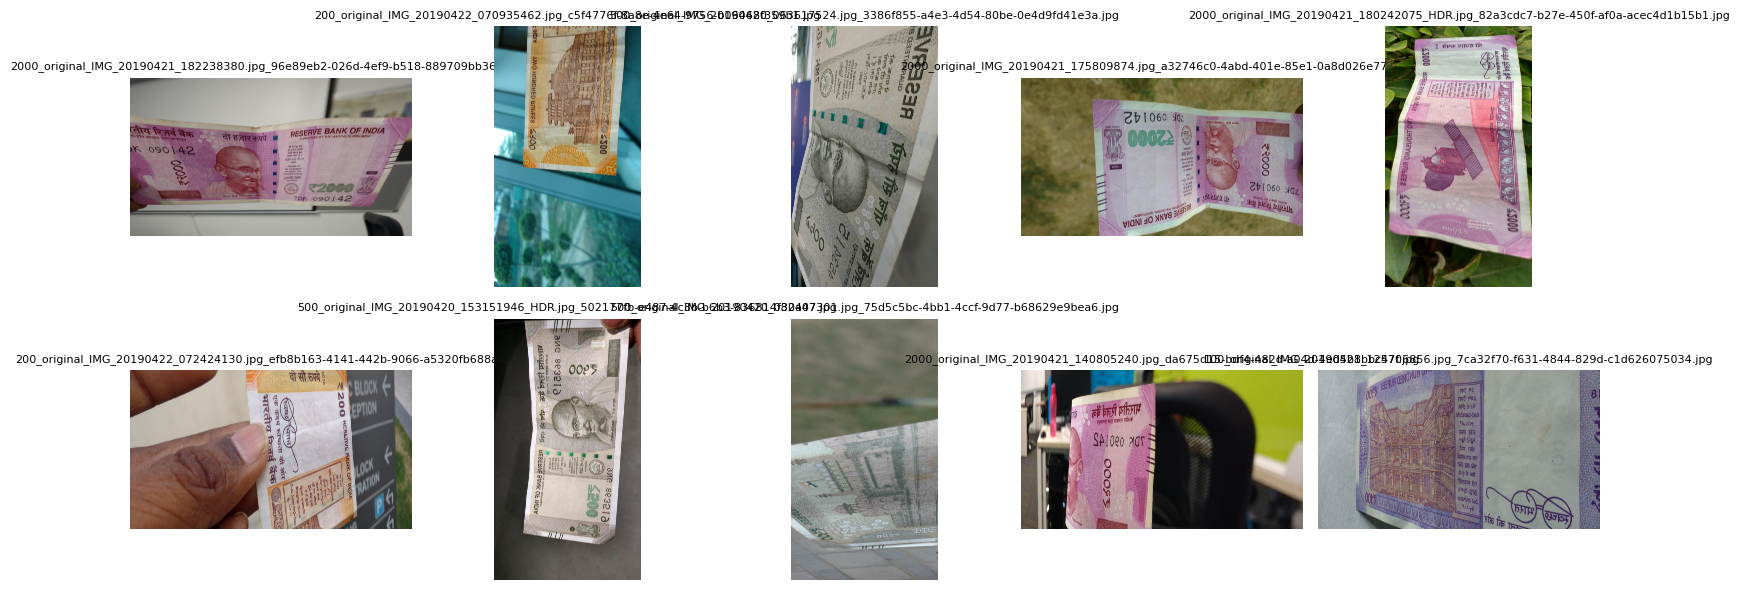

In [6]:
fnames = os.listdir(dataset_path)[:10]  # Get the first 10 filenames

# Create a 2x5 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))  # Adjust figsize as needed
axs = axs.flatten()

# Loop through the first 10 images and display them
for i in range(10):
    filepath = os.path.join(dataset_path, fnames[i])
    try:
        img = Image.open(filepath)
        axs[i].imshow(img)
        axs[i].axis('off')  # Hide axes
        axs[i].set_title(fnames[i], fontsize=8)  # Set title with a smaller font
    except Exception as e:
        axs[i].axis('off')  # Keep the layout intact if an image fails to load
        axs[i].set_title("Error", fontsize=8)

plt.tight_layout()
plt.show()


In [8]:
import os
from PIL import Image

# Define dataset and output directory paths
input_directory = '/Users/vigneshalle/Downloads/fake currency/All notes'
output_directory = '/Users/vigneshalle/Downloads/fake currency/resize notes'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Define the target size for resizing
target_size = (256, 256)  # You can change this size as per your requirement

# Iterate through the files in the input directory
for filename in os.listdir(input_directory):
    file_path = os.path.join(input_directory, filename)
    
    try:
        # Open the image file
        with Image.open(file_path) as img:
            # Resize the image
            img_resized = img.resize(target_size)
            
            # Get the extension and save the resized image in the output directory
            file_extension = filename.split('.')[-1].lower()  # Extract file extension (jpg, png)
            if file_extension in ['jpg', 'jpeg', 'png']:  # Ensure the image has a valid extension
                output_path = os.path.join(output_directory, filename)
                img_resized.save(output_path)
                
    except Exception as e:
        # Ignore files that cannot be opened or resized
        pass

print("Resizing complete. Resized images are saved in:", output_directory)


Resizing complete. Resized images are saved in: /Users/vigneshalle/Downloads/fake currency/resize notes


In [10]:
import os
import shutil
import random

# Define paths for the original and split datasets
input_directory = '/Users/vigneshalle/Downloads/fake currency/resize notes'
train_dir = '/Users/vigneshalle/Downloads/fake currency/train'
val_dir = '/Users/vigneshalle/Downloads/fake currency/val'
test_dir = '/Users/vigneshalle/Downloads/fake currency/test'

# Create the train, val, and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get list of all image files in the dataset
all_images = [img for img in os.listdir(input_directory) if img.lower().endswith(('jpg', 'png'))]

# Shuffle the images to ensure random distribution
random.shuffle(all_images)

# Split the data into train, val, and test sets (80%, 10%, 10%)
train_split = all_images[:int(0.8 * len(all_images))]
val_split = all_images[int(0.8 * len(all_images)):int(0.9 * len(all_images))]
test_split = all_images[int(0.9 * len(all_images)):]

# Function to move images to respective directories
def move_images(image_list, destination):
    for image in image_list:
        src = os.path.join(input_directory, image)
        dst = os.path.join(destination, image)
        shutil.move(src, dst)

# Move images to the respective directories
move_images(train_split, train_dir)
move_images(val_split, val_dir)
move_images(test_split, test_dir)

print(f"Dataset split into train, validation, and test sets:")
print(f"Train set: {len(train_split)} images")
print(f"Validation set: {len(val_split)} images")
print(f"Test set: {len(test_split)} images")


Dataset split into train, validation, and test sets:
Train set: 4000 images
Validation set: 500 images
Test set: 500 images


In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [4]:
# Path to real currency images directory
real_currency_dir = '/Users/vigneshalle/Downloads/fake currency/train'


In [8]:
# Image size
IMG_SIZE = (128, 128)

# Function to load and preprocess images
def load_images(directory):
    images = []
    count = 0  # Counter for processed images
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, IMG_SIZE)
            img = img.astype("float32") / 255.0  # Normalize
            images.append(img)
            count += 1
            print(f"✅ Processed {count} images: {filename}")  # Print progress
    return np.array(images)

# Load training images
real_currency_dir =  '/Users/vigneshalle/Downloads/fake currency/train' # Update path
train_images = load_images(real_currency_dir)
train_images = np.expand_dims(train_images, axis=-1)  # Add channel dimension

# Autoencoder model
def build_autoencoder():
    input_img = keras.Input(shape=(128, 128, 1))
    
    # Encoder
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    x = layers.Conv2D(16, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    
    # Decoder
    x = layers.Conv2D(16, (3, 3), activation="relu", padding="same")(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
    x = layers.UpSampling2D((2, 2))(x)
    output_img = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)
    
    autoencoder = keras.Model(input_img, output_img)
    autoencoder.compile(optimizer="adam", loss="mse")
    return autoencoder

# Callback to print progress after each epoch
class TrainingProgressCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"📊 Epoch {epoch + 1}: Loss = {logs['loss']:.5f}")

# Train the autoencoder
autoencoder = build_autoencoder()
autoencoder.fit(
    train_images, train_images, 
    epochs=50, batch_size=16, shuffle=True, 
    callbacks=[TrainingProgressCallback()]
) 

✅ Processed 1 images: 2000_original_IMG_20190421_182238380.jpg_96e89eb2-026d-4ef9-b518-889709bb3620.jpg
✅ Processed 2 images: 200_original_IMG_20190422_070935462.jpg_c5f4776f-8a8e-4e64-9756-b06468f359b1.jpg
✅ Processed 3 images: 500_original_IMG_20190420_063617524.jpg_3386f855-a4e3-4d54-80be-0e4d9fd41e3a.jpg
✅ Processed 4 images: 2000_original_IMG_20190421_175809874.jpg_a32746c0-4abd-401e-85e1-0a8d026e77a7.jpg
✅ Processed 5 images: 200_original_IMG_20190422_072424130.jpg_efb8b163-4141-442b-9066-a5320fb688a0.jpg
✅ Processed 6 images: 500_original_IMG_20190420_153151946_HDR.jpg_502177fb-e487-4c3b-b6b3-836814f30a07.jpg
✅ Processed 7 images: 500_original_IMG_20190420_082447301.jpg_75d5c5bc-4bb1-4ccf-9d77-b68629e9bea6.jpg
✅ Processed 8 images: 100_original_IMG_20190421_125706856.jpg_7ca32f70-f631-4844-829d-c1d626075034.jpg
✅ Processed 9 images: 2000_original_IMG_20190421_180432537.jpg_d11ec441-a72d-41f5-bd48-b5e72fd7182d.jpg
✅ Processed 10 images: 2000_original_IMG_20190421_141736478.jpg_81

In [4]:
import numpy as np

# Save real currency descriptors in a file
np.savez_compressed('/Users/vigneshalle/Downloads/fake currency/model', *real_descriptors)

print("✅ Model saved successfully!")


NameError: name 'real_descriptors' is not defined

In [2]:
model_path = "/Users/vigneshalle/Downloads/fake currency/autoencoder.h5"
autoencoder.save(model_path)
print("✅ Model saved successfully!")

NameError: name 'autoencoder' is not defined